In [35]:
import numpy as np
import time 
import os
import matplotlib.pyplot as plt
from scipy.io import readsav
%matplotlib inline

#### Importing from pyspedas

In [36]:
from pyspedas import wind
from pytplot import tplot, get_data

In [41]:
data = wind.waves(trange=['1995-6-25', '1995-6-26'],get_support_data=True)
print(data)
export_data = get_data('E_VOLTAGE_TNR')

07-Jun-22 16:03:37: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/wind/waves/wav_h1/1995/
07-Jun-22 16:03:37: File is current: wind_data/waves/wav_h1/1995/wi_h1_wav_19950625_v01.cdf


['Epoch', 'E_VOLTAGE_RAD2', 'E_VOLTAGE_RAD1', 'E_VOLTAGE_TNR', 'Minimum_voltage_RAD2', 'Minimum_voltage_RAD1', 'Minimum_voltage_TNR', 'Frequency_RAD2', 'Frequency_RAD1', 'Frequency_TNR', 'Epoch2']


In [ ]:
data2 = wind.threedp(trange='1995-6-25', '1995-6-26')

In [38]:
# This line finds the index with the minimum time to the target 
target_time = 804061986.432
loc = min(range(len(export_data.times)), key=lambda i: abs(target_time-export_data.times[i]))

In [39]:
print("TARGET TIME: "+str(time.strftime("%d %b %Y %H:%M:%S", time.gmtime(target_time))))

print("Closest times to Target Time")
print(str(time.strftime("%d %b %Y %H:%M:%S", time.gmtime(export_data.times[loc-1]))))
print(str(time.strftime("%d %b %Y %H:%M:%S", time.gmtime(export_data.times[loc]))))
print(str(time.strftime("%d %b %Y %H:%M:%S", time.gmtime(export_data.times[loc+1]))))

TARGET TIME: 25 Jun 1995 06:33:06
Closest times to Target Time
25 Jun 1995 06:32:30
25 Jun 1995 06:33:30
25 Jun 1995 06:34:30


#### Importing CSV

In [40]:
import csv

In [13]:
with open("WI_H1_WAV_235001.csv") as file:
    reader = csv.reader(file)
    for _ in range(41):
        next(reader)
    for line in reader:
        print(line[0])

1995-06-25T06:32:30.000Z
1995-06-25T06:33:30.000Z
#  
# Key Parameter and Survey data (labels K0
# Generated by CDAWeb on: Thu Jun  2 19:30:49 2022


#### Importing CDF

In [13]:
os.environ["CDF_LIB"] = "/usr/local/lib/cdf/lib/"

In [18]:
from spacepy import pycdf
import netCDF4 as nc

In [34]:
with nc.Dataset("data/wi_wav_tnr_19950625.nc") as ds:
    print(ds)
    print("")
    print(np.shape(ds["tnr_ch1_spec"][:]))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): n_times(19419), n_bins(96)
    variables(dimensions): float64 tnr_ch1_time(n_times), float64 tnr_ch1_freq(n_bins), float64 tnr_ch1_spec(n_bins, n_times)
    groups: 

(96, 19419)


In [48]:
e = 1.602176634e-19
m = 9.109383701528e-31
e_0 = 8.854187812813e-12

with pycdf.CDF("data/wi_h0_wav_19950625_v01.cdf") as cdf:
    print(cdf)
    print(cdf['Epoch'][1335:1339])
    ne = cdf["Ne"][1335]
    print(ne, (ne*(e**2)/(m*e_0))**.5/(2*np.pi))
    print(pd.DataFrame(cdf['Ne_Quality'][:]).describe())

Epoch: CDF_EPOCH [4884]
GAP_FLAG: CDF_INT4 [4884]
Ne: CDF_REAL4 [4884]
Ne_Quality: CDF_INT4 [4884]
Ne_peak: CDF_REAL4 [4884]
Time_PB5: CDF_INT4 [4884, 3]
format_time: CDF_CHAR*2 [3] NRV
label_time: CDF_CHAR*27 [3] NRV
unit_time: CDF_CHAR*4 [3] NRV
[datetime.datetime(1995, 6, 25, 6, 33, 7, 904000)
 datetime.datetime(1995, 6, 25, 6, 33, 25, 568000)
 datetime.datetime(1995, 6, 25, 6, 33, 43, 232000)
 datetime.datetime(1995, 6, 25, 6, 34, 0, 896000)]
12.642000198364258 31.924165899128376
                 0
count  4884.000000
mean    190.998771
std      62.192292
min       4.000000
25%     155.500000
50%     212.000000
75%     243.000000
max     255.000000


In [206]:
with pycdf.CDF("data/wi_k0_wav_19950625_v02.cdf") as cdf:
    print(cdf)
    print(cdf['Epoch'][:20])

E_Average: CDF_REAL4 [480, 76]
E_Backg: CDF_REAL4 [76] NRV
E_Quality: CDF_INT4 [480]
E_freq_val: CDF_REAL4 [76] NRV
E_transient: CDF_REAL4 [480]
Epoch: CDF_EPOCH [480]
GAP_FLAG: CDF_INT4 [480]
Moon_label: CDF_CHAR*10 [3] NRV
Moon_pos: CDF_REAL8 [480, 3]
Ne: CDF_REAL4 [480]
Ne_Quality: CDF_INT4 [480]
Sol_max: CDF_REAL4 [480]
Sol_min: CDF_REAL4 [480]
Time_PB5: CDF_INT4 [480, 3]
format_time: CDF_CHAR*2 [3] NRV
freq_minus: CDF_REAL4 [76] NRV
freq_plus: CDF_REAL4 [76] NRV
label_time: CDF_CHAR*27 [3] NRV
unit_time: CDF_CHAR*4 [3] NRV
[datetime.datetime(1995, 6, 25, 0, 1, 30)
 datetime.datetime(1995, 6, 25, 0, 4, 30)
 datetime.datetime(1995, 6, 25, 0, 7, 30)
 datetime.datetime(1995, 6, 25, 0, 10, 30)
 datetime.datetime(1995, 6, 25, 0, 13, 30)
 datetime.datetime(1995, 6, 25, 0, 16, 30)
 datetime.datetime(1995, 6, 25, 0, 19, 30)
 datetime.datetime(1995, 6, 25, 0, 22, 30)
 datetime.datetime(1995, 6, 25, 0, 25, 30)
 datetime.datetime(1995, 6, 25, 0, 28, 30)
 datetime.datetime(1995, 6, 25, 0, 31, 

In [98]:
with pycdf.CDF("data/wi_h1_wav_19950625_v01.cdf") as cdf:
    print(cdf)
    print(cdf['Frequency_TNR'][:])

E_VOLTAGE_RAD1: CDF_REAL4 [1440, 256]
E_VOLTAGE_RAD2: CDF_REAL4 [1440, 256]
E_VOLTAGE_TNR: CDF_REAL4 [1440, 96]
Epoch: CDF_EPOCH [1440]
Epoch2: CDF_EPOCH [1]
Frequency_RAD1: CDF_INT2 [256] NRV
Frequency_RAD2: CDF_INT2 [256] NRV
Frequency_TNR: CDF_REAL4 [96] NRV
Minimum_voltage_RAD1: CDF_REAL4 [1, 256]
Minimum_voltage_RAD2: CDF_REAL4 [1, 256]
Minimum_voltage_TNR: CDF_REAL4 [1, 96]
[  4.      4.177   4.362   4.555   4.757   4.967   5.187   5.417   5.657
   5.907   6.169   6.442   6.727   7.025   7.336   7.661   8.      8.354
   8.724   9.11    9.514   9.935  10.375  10.834  11.314  11.815  12.338
  12.884  13.454  14.05   14.672  15.322  16.     16.708  17.448  18.221
  19.027  19.87   20.749  21.668  22.627  23.629  24.675  25.768  26.909
  28.1    29.344  30.643  32.     33.417  34.896  36.441  38.055  39.739
  41.499  43.336  45.255  47.258  49.351  51.536  53.817  56.2    58.688
  61.287  64.     66.833  69.792  72.882  76.109  79.479  82.998  86.672
  90.51   94.517  98.701 103.071 

In [78]:
with pycdf.CDF("data/wi_h0s_wav_19950625063307_19950625063307.cdf") as cdf:
    print(cdf)
    print(cdf['Epoch'][:])

Epoch: CDF_EPOCH [1]
NE$: CDF_FLOAT [1]
Ne_Quality: CDF_INT4 [1]
Ne_peak: CDF_FLOAT [1]
[datetime.datetime(1995, 6, 25, 6, 33, 7, 904000)]


#### Processing Binary Data

In [3]:
binary_data = np.fromfile("data/wind_waves_tnr_19950625.tnr")

In [13]:
n = 69320/96*40
print(f"Days/measurement: {1/n}")
print(f"Hours/measurement: {24/n}")
print(f"Minutes/measurement: {24*60/n}")
print(f"Seconds/measurement: {24*60*60/n}")
print(f"Measurements/second: {n/24/60/60}")
n

Days/measurement: 3.462204270051933e-05
Hours/measurement: 0.0008309290248124638
Minutes/measurement: 0.04985574148874783
Seconds/measurement: 2.9913444893248697
Measurements/second: 0.3342978395061729


28883.333333333336

In [14]:
69320/4884

14.193284193284192

In [210]:
for i in range(69320):
    if i != 0 and 69320%i==0:
        print(i)
69320/17.69

1
2
4
5
8
10
20
40
1733
3466
6932
8665
13864
17330
34660


3918.598078010175

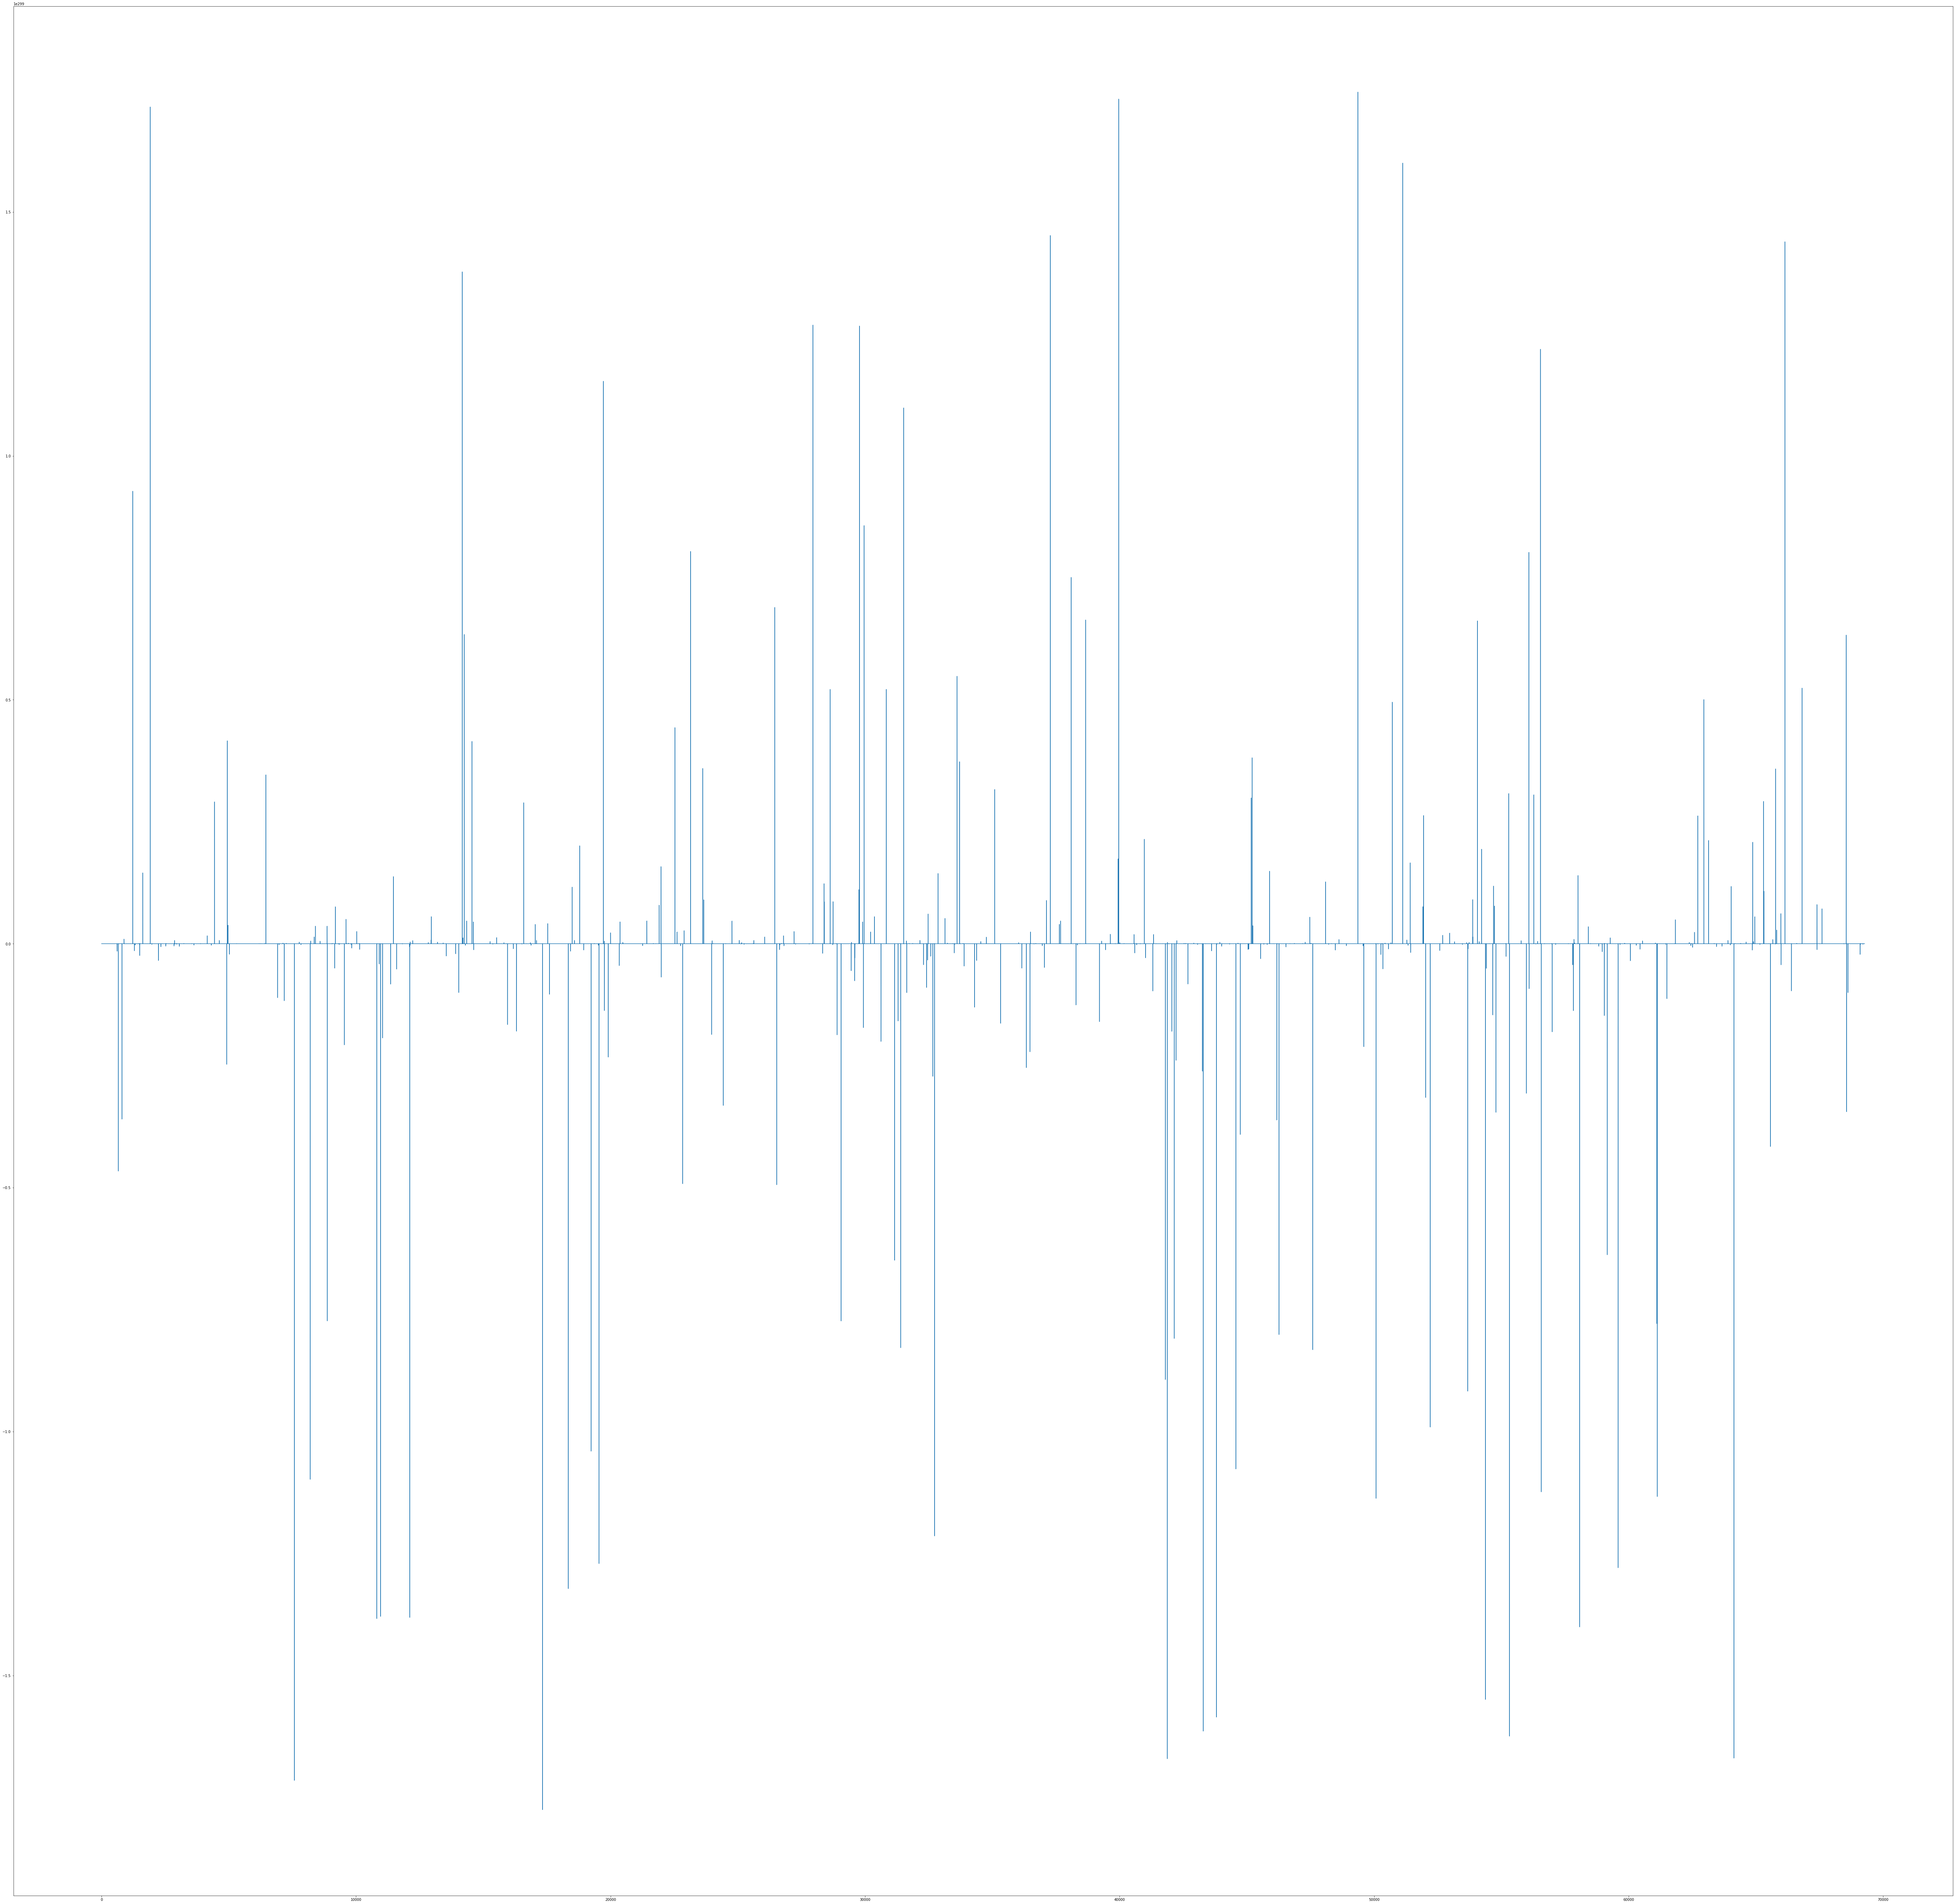

1.74574019854625e+299

In [8]:
plt.figure(figsize=(100,100))
plt.plot(refined_tnr)
#plt.yscale('log')
plt.show()
max(refined_tnr)

In [5]:
refined_tnr = [num/10**9 for num in binary_data if not np.isnan(num)]

In [186]:
[num for num in refined_tnr if np.isnan(num)]

[]

In [207]:
flow=4.
fhigh=245.146
fspace=.188144e-1

In [208]:
(fhigh-flow)/fspace

12817.09754230802

### Importing sav file

In [5]:
from scipy.io import readsav

file2 = readsav("wi_wav_tnr_19950625.sav", verbose=True)
print(type(file2))

Exception: record['rectype']=PROMOTE64 not implemented

In [7]:
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy.io import readsav
data_dir = pjoin(dirname(sio.__file__),'data')
sav_fname = pjoin(data_dir, 'wi_wav_tnr_19950625.sav')
sav_data = readsav(sav_fname)

FileNotFoundError: [Errno 2] No such file or directory: '/home/ayushmaan/.local/lib/python3.10/site-packages/scipy/io/data/wi_wav_tnr_19950625.sav'

In [10]:
import pandas as pd
import pyreadstat
file = pyreadstat.read_sav("wi_wav_tnr_19950625.sav")

ReadstatError: Invalid file, or file has unsupported features

NameError: name 'random' is not defined